<a href="https://colab.research.google.com/github/laredein/NeuralNetworks/blob/master/XORwithoutlibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
def f(model,cmap='Paired'):
    cmap=plt.get_cmap(cmap)
    x_span=np.linspace(0,1,20)
    y_span=np.linspace(0,1,20)
    xx,yy=np.meshgrid(x_span, y_span)
    labels=model.predict(np.c_[xx.ravel(), yy.ravel()])
    z=labels.reshape(xx.shape)
    ax=plt.subplots()[1]
    ax.contourf(xx, yy,z,cmap=cmap,alpha=0.5)
    plt.show()

def sigmoid(arr):
    return 1/(1+math.e**(-arr))

In [57]:
class andnn:
    def __init__(self,inp,out):
        self.input=[i for i in inp]
        self.out=out
        for i in range(4):
            self.input[i]=np.append(self.input[i],1)
        self.input=np.array(self.input)
        self.momentum=np.array([0 for _ in range(3)])
        self.weights=np.array([random.random() for _ in range(3)])
    def forward(self):
        out=np.dot(self.input,self.weights)
        return sigmoid(out)
    def predict(self,inp):
        input=[i for i in inp]
        for i in range(len(inp)):
            input[i]=np.append(input[i],1)
        input=np.array(input)
        out=np.dot(input,self.weights)
        return sigmoid(out)
    def backward(self):
        o=self.forward()
        delta=(self.out-o)*(1-o)*o
        for i in range(4):
            _=0.8*np.dot(delta[i],self.input[i])+0.2*self.momentum
            self.weights=self.weights+_
            self.momentum=_

inp=np.array([[0,0],[0,1],[1,0],[1,1]])
out=np.array([0,0,0,1])
nn=andnn(inp,out)
for i in range(300):
    nn.backward()
print(nn.predict(inp))

[0.0021838  0.10814776 0.10813932 0.87043528]


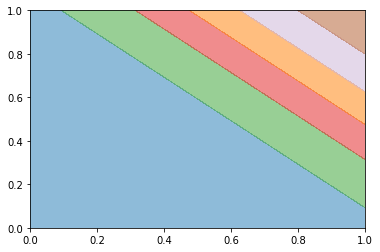

In [58]:
f(nn)

In [59]:
class xornn:
    def __init__(self,inp,out):
        self.inp=[i for i in inp]
        self.out=out
        for i in range(4):
            self.inp[i]=np.append(self.inp[i],1)
        self.inp=np.array(self.inp)
        self.hidmomentum=np.zeros((3))
        self.inpmomentum=np.zeros((3,2))
        self.hidweights=np.random.random_sample((3))*2-1
        self.inpweights=np.random.random_sample((3,2))*2-1
    def forward(self,inp):
        self.hid=np.dot(inp,self.inpweights)
        self.hid=sigmoid(self.hid)
        self.hid=np.append(self.hid,[1])
        out=np.dot(self.hid,self.hidweights)
        out=sigmoid(out)
        return out
    def backward(self):
        for i in range(4):
            o=self.forward(self.inp[i])
            delta=(self.out[i]-o)*o*(1-o)
            changehid=2*np.dot(delta,self.hid)+0.4*self.hidmomentum
            self.hidweights=self.hidweights+changehid
            self.hidmomentum=changehid
            deltas=self.hid*(1-self.hid)
            deltas=deltas[0:2]*delta*self.hidweights[0:2]
            change=2*self.inp[i]*deltas[:,None]+0.4*self.inpmomentum.T
            self.inpweights=self.inpweights+change.T
            self.inpmomentum=change.T
    def predict(self,inp):
        out=[self.forward(np.append(i,1)) for i in inp]
        out=np.array(out)
        return out
inp=np.array([[0,0],[0,1],[1,0],[1,1]])
out=np.array([0,1,1,0])
nn=xornn(inp,out)


for i in range(300):
    nn.backward()

print(nn.predict(inp))

[0.04436443 0.95081755 0.95852784 0.0387132 ]


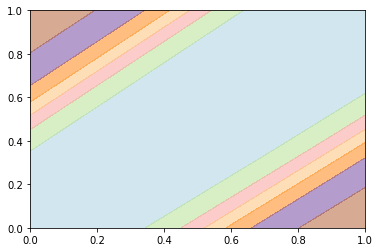

In [60]:
f(nn)